# Brownian Motion

Brownian motion (or Wiener Process) is a ubiquitous concept in mathematical finance and represents the main building block of many quantiative finance models. It represents the limiting case of a _random walk_.

In [1]:
import numpy as np
from numpy.random import normal as norm
import matplotlib.pyplot as plt
import seaborn as sns

### Symmetric Random Walk

First, let us build a Random Walk process. The one-dimensional symmetric random walk $M_t$ is defined as follows:
$$ M_t = \sum^T_{t=1} X_t$$
where $X_t$ is a random variable that takes value 1 with probability $p=0.5$ and value -1 with probability $1-p=0.5$ (a fair coin toss).

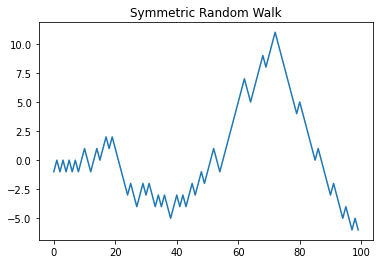

In [2]:
# construction of a symmetric random walk
T = 100 # number of periods
x = np.random.randint(0, 2, size=T) # coin toss proxy
x[x == 0] = -1
rw = np.cumsum(x)
sns.lineplot(data=rw).set_title('Symmetric Random Walk')
plt.show()

The increments are independent and have expected value zero and variance 1. The symmetric random walk accumulates variance at rate 1 per unit of time. This result will be of interest in the following developments. Hence the variance over any time interval $k$ to $l$ with $k<l$ is given by $l-k$. Since the $X_j$ are independent, we have that the variance is the sum of the variance of the single terms
$$
Var(M_l - M_k) = \sum^l_{j=k} Var(X_j) = \sum^l_{j=k} 1 = l - k
$$

### Scaled Symmetric Random Walk

In order to further close the gap to the Brownian Motion, we scale down the steps of the symmetric random walk defined above. We fix a positive integer $n$ and define the _Scaled Symmetric Random Walk_:
$$
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
$$
Suppose we choose $T=4$ and $n=100$, the scaled symmetric random walk will be as follows:
$$
W^{(100)}(t) = \frac{1}{10}M_{nt}
$$
Accordingly, $T=4$ will be reached after $nT = 400$ coin tosses. Between $t_0=0$ and $t_1 = 1$ there will be 100 steps. 
As $n$ approaches $\infty$, the scaled symmetric random walk converges to the brownian motion. 

Let us now build a working example.

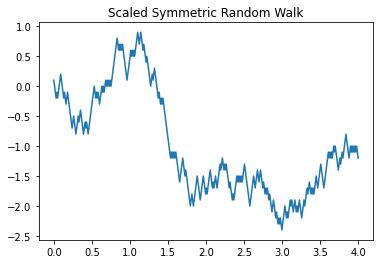

In [3]:
# construction of a scaled symmetric random walk
T = 4 # number of periods
n = 100 # number of steps
x = np.random.randint(0, 2, size=n*T) # coin toss proxy
x[x == 0] = -1
x = x/np.sqrt(n) # scaling of the step by 1/sqrt(n) 
ax = np.linspace(0, T, n*T) # x axis 
rw = np.cumsum(x)
sns.lineplot(y=rw, x=ax).set_title('Scaled Symmetric Random Walk')
plt.show()

Like the random walk, the scaled random walk has independent increments. Non-overlapping increments depend on different coin tosses and are thus independent. Futhermore for $ 0 \leq s \leq t$ we have that 
$$
Var(W^{(n)}(t) - W^{(n)}(s)) = s - t
$$
This is a consequence of the fact that $ W^{(n)}(t) - W^{(n)}(s)$ is the sum of $n(t-s)$ independent random variables with expected value 0 and variance $1/n$. 

Let us finally consider the quadratic variation up to time $t$ of the scaled symmetric random walk. This is defined as the sum of the increments of the process squared. Formally
$$
[W^{(n)}W^{(n)}](t) = \sum^{nt}_{j=1}\left[W^{(n)}\left( \frac{j}{n}\right) - W^{(n)}\left( \frac{j-1}{n}\right)\right]^2
$$
So if we would like to compute the quadratic variation up to time $t=2.71$ we can write
$$\begin{align*}
[W^{(100)}W^{(100)}](2.71) &= \sum^{271}_{j=1}\left[W^{(100)}\left( \frac{j}{100}\right) - W^{(100)}\left( \frac{j-1}{100}\right)\right]^2 \\ 
& = \sum^{271}_{j=1}\left[\frac{1}{\sqrt{100}} X_j\right]^2 = \sum^{271}_{j=1}\frac{1}{100} = \frac{271}{100} = 2.71 
\end{align*}
$$
We derive the last equality recalling that $X_j^2 = 1$.

### PROOF QUADRATIC VARIATION

In [ ]:
x = np.linspace(0,7,100)
f = np.sin(x)
plt.plot(f)

In [ ]:
# first order variation
var = np.abs(np.diff(f))
fv = np.sum(var)
fv

In [ ]:
# quadratic variation
var2 = (np.diff(f))**2
qv = np.sum(var2)
qv
# increasing the number of subintervals in linspace the quadratic variation converges to zero

In [ ]:
# quadratic variation of a brownian motion
T = 5
n = 100
sigma = np.sqrt(1/n)
increments = norm(scale=sigma, size=T*n)
bt = np.cumsum(increments)
bt = np.insert(bt, 0,0)
plt.plot(bt)

In [ ]:
# quadratic variation of the brownian motion
var_bt = (np.diff(bt))**2
qv = np.sum(var_bt)
qv

In [ ]:
# plot of the convergence of the quadratic variation to T
n_list = [i for i in range(1,500)]
qv_list = []
for n in n_list:
    avg_list = []
    for c in range(1,10):
        T = 5
        sigma = np.sqrt(1/n)
        increments = norm(scale=sigma, size=T*n)
        bt = np.cumsum(increments)
        bt = np.insert(bt, 0,0)
        var_bt = (np.diff(bt))**2
        qv = np.sum(var_bt)
        avg_list.append(qv)
    qv_list.append(sum(avg_list)/len(avg_list))
    
plt.plot(n_list, qv_list)
plt.ylim([0,10])
    
    

In [3]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)